In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# url = 'https://docs.google.com/spreadsheets/d/ABC123XYZ456/export?format=csv'
url = 'https://docs.google.com/spreadsheets/d/1o8Dap7BauoPZmJQ6nieezQ4Yb7fHtEp2DrlDQto3F_0/export?format=csv'
df = pd.read_csv(url)

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', '⁠Time Spent Studying (per day)',
       'Average Hours of Sleep per Night',
       '⁠Physical Exercise/Sports Participation (per day)',
       'Productivity on a Scale of 1-10', 'Stress Levels on a Scale of 1-5',
       '⁠Pointer (Most Recent Semester)'],
      dtype='object')

In [ ]:
df.head()

,Timestamp,Age,Gender,⁠Time Spent Studying (per day),Average Hours of Sleep per Night,⁠Physical Exercise/Sports Participation (per day),Productivity on a Scale of 1-10,Stress Levels on a Scale of 1-5,⁠Pointer (Most Recent Semester)
0,8/22/2024 14:35:59,19,Male,4,6,1,7,1,8
1,8/22/2024 14:36:07,20,Male,2,5,Yes,7,4,6.55
2,8/22/2024 14:36:15,20,Female,4,8,1,5,3,7.5
3,8/22/2024 14:36:42,20,Male,3 hr,7,1hr,7,3,9.55
4,8/22/2024 14:36:48,20,Female,1 hours,10 hours,0 hours,7,4,9.9


In [ ]:
def clean_data(df):
    # Ensure all column names are strings and clean them up
    df.columns = [str(col).strip().replace('⁠', '').replace(' ', '_') for col in df.columns]

    df['Time_Spent_Studying_(per_day)'] = df['Time_Spent_Studying_(per_day)'].astype(str).str.extract('(\d+)').astype(float)
    # df.loc[df['Physical_Exercise/Sports_Participation_(per_day)'] > 15, 'Physical_Exercise/Sports_Participation_(per_day)'] /= 60
    df['Average_Hours_of_Sleep_per_Night'] = df['Average_Hours_of_Sleep_per_Night'].astype(str).str.extract('(\d+)').astype(float)

    df['Physical_Exercise/Sports_Participation_(per_day)'] = df['Physical_Exercise/Sports_Participation_(per_day)'].astype(str).str.extract('(\d+)').astype(float)

    # Convert relevant columns directly to numeric
    df['Productivity_on_a_Scale_of_1-10'] = pd.to_numeric(df['Productivity_on_a_Scale_of_1-10'], errors='coerce')

    df['Stress_Levels_on_a_Scale_of_1-5'] = pd.to_numeric(df['Stress_Levels_on_a_Scale_of_1-5'], errors='coerce')

    df['Pointer_(Most_Recent_Semester)'] = pd.to_numeric(df['Pointer_(Most_Recent_Semester)'], errors='coerce')

    # Replace missing values with 0 for exercise participation
    df['Physical_Exercise/Sports_Participation_(per_day)'].fillna(0, inplace=True)
    return df

In [ ]:
df_cleaned = clean_data(df)

In [ ]:
df_cleaned

,Timestamp,Age,Gender,Time_Spent_Studying_(per_day),Average_Hours_of_Sleep_per_Night,Physical_Exercise/Sports_Participation_(per_day),Productivity_on_a_Scale_of_1-10,Stress_Levels_on_a_Scale_of_1-5,Pointer_(Most_Recent_Semester)
0,8/22/2024 14:35:59,19,Male,4.0,6.0,1.0,7,1,8.000
1,8/22/2024 14:36:07,20,Male,2.0,5.0,0.0,7,4,6.550
2,8/22/2024 14:36:15,20,Female,4.0,8.0,1.0,5,3,7.500
3,8/22/2024 14:36:42,20,Male,3.0,7.0,1.0,7,3,9.550
4,8/22/2024 14:36:48,20,Female,1.0,10.0,0.0,7,4,9.900
...,...,...,...,...,...,...,...,...,...
108,8/22/2024 14:46:05,20,Male,2.0,8.0,1.0,5,3,6.000
109,8/22/2024 14:51:42,21,Male,1.0,8.0,1.0,8,3,9.100
110,8/22/2024 15:26:36,19,Male,2.0,8.0,0.0,1,1,8.200
111,8/22/2024 20:59:57,20,Male,4.0,5.0,1.0,7,2,8.292


In [ ]:
df_cleaned = df_cleaned.drop("Timestamp", axis=1)

In [ ]:
df_cleaned.head()

,Age,Gender,Time_Spent_Studying_(per_day),Average_Hours_of_Sleep_per_Night,Physical_Exercise/Sports_Participation_(per_day),Productivity_on_a_Scale_of_1-10,Stress_Levels_on_a_Scale_of_1-5,Pointer_(Most_Recent_Semester)
0,19,Male,4.0,6.0,1.0,7,1,8.00
1,20,Male,2.0,5.0,0.0,7,4,6.55
2,20,Female,4.0,8.0,1.0,5,3,7.50
3,20,Male,3.0,7.0,1.0,7,3,9.55
4,20,Female,1.0,10.0,0.0,7,4,9.90


In [ ]:
df_cleaned.describe()

,Age,Time_Spent_Studying_(per_day),Average_Hours_of_Sleep_per_Night,Physical_Exercise/Sports_Participation_(per_day),Productivity_on_a_Scale_of_1-10,Stress_Levels_on_a_Scale_of_1-5,Pointer_(Most_Recent_Semester)
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,111.000000
mean,20.194690,3.504425,7.336283,3.318584,6.141593,3.000000,7.766326
std,2.987648,4.075458,1.795881,9.409594,1.985965,1.232013,1.173581
min,18.000000,0.000000,3.000000,0.000000,1.000000,1.000000,0.500000
25%,20.000000,2.000000,6.000000,0.000000,5.000000,2.000000,7.300000
50%,20.000000,3.000000,7.000000,1.000000,6.000000,3.000000,7.810000
75%,20.000000,4.000000,8.000000,1.000000,7.000000,4.000000,8.271000
max,50.000000,30.000000,17.000000,45.000000,10.000000,5.000000,11.000000


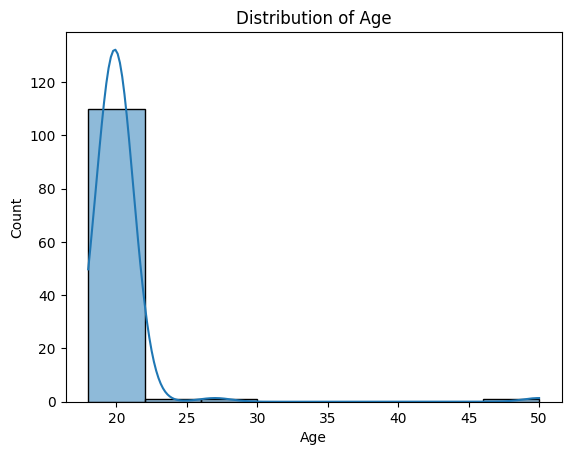

In [ ]:
# Distribution of Age
sns.histplot(df_cleaned['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

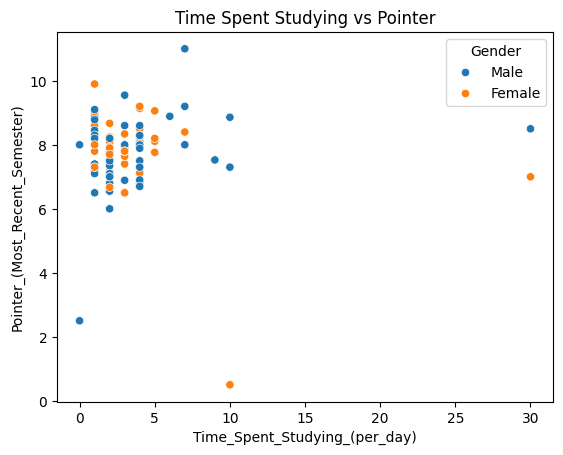

In [ ]:
# Scatter plot between Time Spent Studying and Pointer
sns.scatterplot(data=df_cleaned, x='Time_Spent_Studying_(per_day)', y='Pointer_(Most_Recent_Semester)', hue='Gender')
plt.title('Time Spent Studying vs Pointer')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Gender'])
    ],
    remainder='passthrough'
)

In [ ]:
df_cleaned = pd.DataFrame(preprocessor.fit_transform(df_cleaned), columns=preprocessor.get_feature_names_out())

In [ ]:
df_cleaned.corr()

,encoder__Gender_Female,encoder__Gender_Male,remainder__Age,remainder__Time_Spent_Studying_(per_day),remainder__Average_Hours_of_Sleep_per_Night,remainder__Physical_Exercise/Sports_Participation_(per_day),remainder__Productivity_on_a_Scale_of_1-10,remainder__Stress_Levels_on_a_Scale_of_1-5,remainder__Pointer_(Most_Recent_Semester)
encoder__Gender_Female,1.000000,-1.000000,0.080462,-0.003115,0.049213,0.068822,0.069747,0.176862,0.031527
encoder__Gender_Male,-1.000000,1.000000,-0.080462,0.003115,-0.049213,-0.068822,-0.069747,-0.176862,-0.031527
remainder__Age,0.080462,-0.080462,1.000000,0.153186,0.267255,-0.013342,-0.275553,-0.164948,-0.518958
remainder__Time_Spent_Studying_(per_day),-0.003115,0.003115,0.153186,1.000000,-0.020944,0.001127,-0.088330,-0.024895,-0.014554
remainder__Average_Hours_of_Sleep_per_Night,0.049213,-0.049213,0.267255,-0.020944,1.000000,-0.062403,-0.211239,-0.274409,-0.343963
remainder__Physical_Exercise/Sports_Participation_(per_day),0.068822,-0.068822,-0.013342,0.001127,-0.062403,1.000000,0.140902,-0.120149,0.036136
remainder__Productivity_on_a_Scale_of_1-10,0.069747,-0.069747,-0.275553,-0.088330,-0.211239,0.140902,1.000000,0.058387,0.354957
remainder__Stress_Levels_on_a_Scale_of_1-5,0.176862,-0.176862,-0.164948,-0.024895,-0.274409,-0.120149,0.058387,1.000000,-0.035630
remainder__Pointer_(Most_Recent_Semester),0.031527,-0.031527,-0.518958,-0.014554,-0.343963,0.036136,0.354957,-0.035630,1.000000


<Axes: >

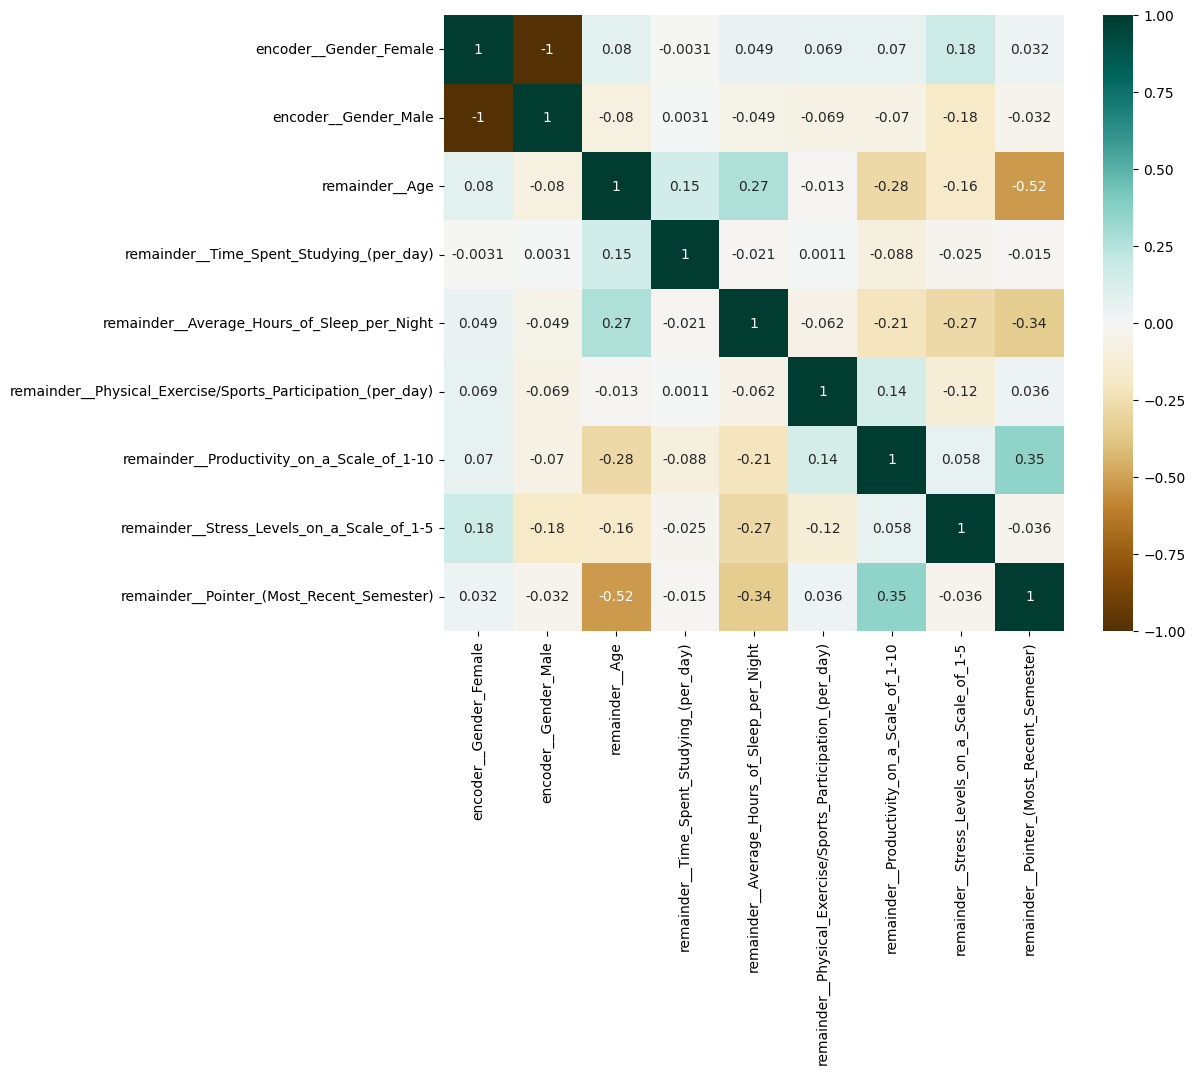

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True,cmap='BrBG')

In [ ]:
df_cleaned = df_cleaned.drop("remainder__Physical_Exercise/Sports_Participation_(per_day)", axis=1)

<Axes: >

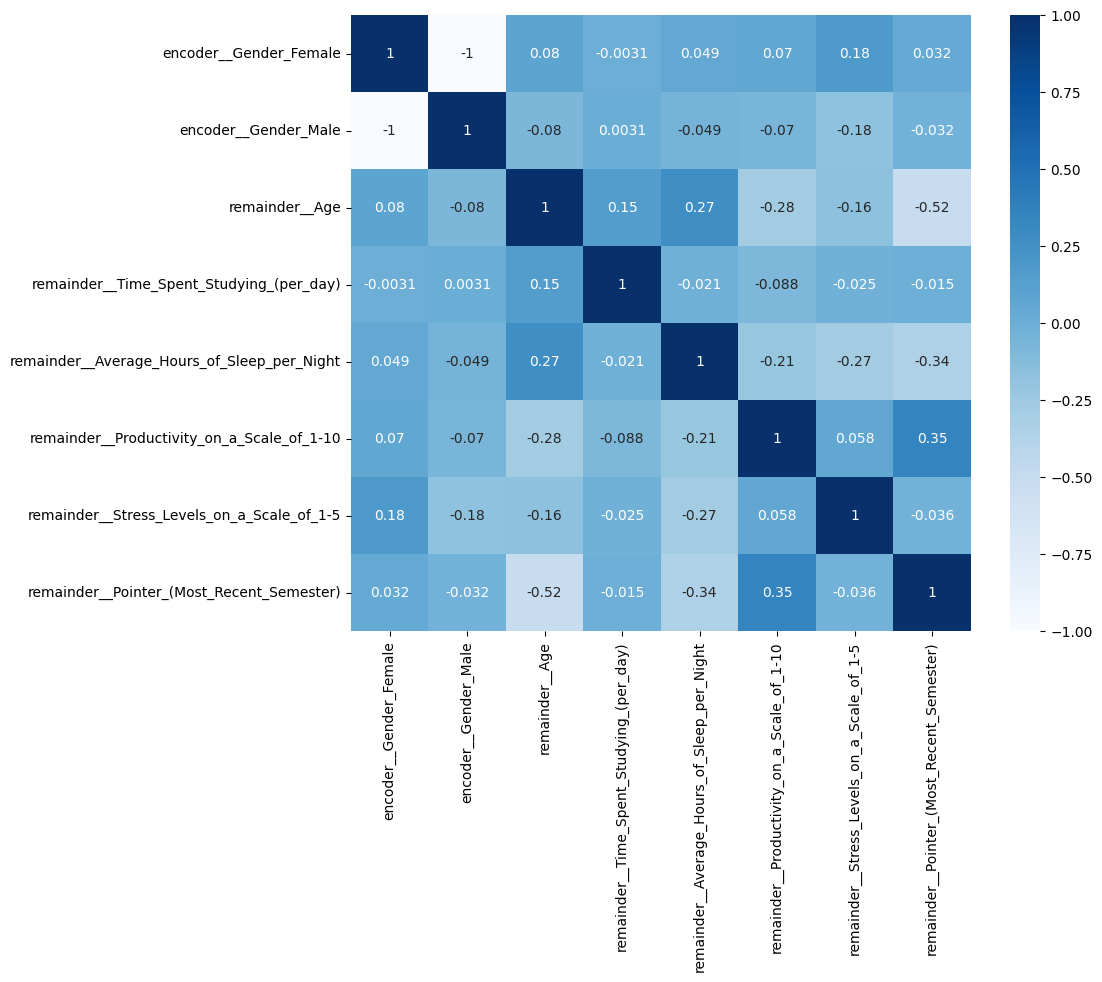

In [ ]:
plt.figure(figsize=(10, 8))
cutom_palette = sns.color_palette(["blue","white","yellow","orange"],as_cmap=True)
sns.heatmap(df_cleaned.corr(), annot=True,cmap='Blues')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = df_cleaned
df.head()

,encoder__Gender_Female,encoder__Gender_Male,remainder__Age,remainder__Time_Spent_Studying_(per_day),remainder__Average_Hours_of_Sleep_per_Night,remainder__Productivity_on_a_Scale_of_1-10,remainder__Stress_Levels_on_a_Scale_of_1-5,remainder__Pointer_(Most_Recent_Semester)
0,0.0,1.0,19.0,4.0,6.0,7.0,1.0,8.00
1,0.0,1.0,20.0,2.0,5.0,7.0,4.0,6.55
2,1.0,0.0,20.0,4.0,8.0,5.0,3.0,7.50
3,0.0,1.0,20.0,3.0,7.0,7.0,3.0,9.55
4,1.0,0.0,20.0,1.0,10.0,7.0,4.0,9.90


In [ ]:
y = df['remainder__Pointer_(Most_Recent_Semester)']


In [ ]:
y.head()

,remainder__Pointer_(Most_Recent_Semester)
0,8.00
1,6.55
2,7.50
3,9.55
4,9.90


In [ ]:
df = df.drop("remainder__Pointer_(Most_Recent_Semester)", axis=1)

In [ ]:
X = df

In [ ]:
X.head()

,encoder__Gender_Female,encoder__Gender_Male,remainder__Age,remainder__Time_Spent_Studying_(per_day),remainder__Average_Hours_of_Sleep_per_Night,remainder__Productivity_on_a_Scale_of_1-10,remainder__Stress_Levels_on_a_Scale_of_1-5
0,0.0,1.0,19.0,4.0,6.0,7.0,1.0
1,0.0,1.0,20.0,2.0,5.0,7.0,4.0
2,1.0,0.0,20.0,4.0,8.0,5.0,3.0
3,0.0,1.0,20.0,3.0,7.0,7.0,3.0
4,1.0,0.0,20.0,1.0,10.0,7.0,4.0


In [ ]:
y.mean(axis=0)

7.766326126126125

In [ ]:
y = y.fillna(y.mean(axis=0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

regressor = Pipeline(steps=[('regressor', LinearRegression())])
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test,y_pred)}')

Mean Absolute Error: 0.8561595481694242
Mean Squared Error: 1.815953813961253
R^2 Score: -1.0270918371295776


In [ ]:
def predict_pointer(age, gender, time_studying, sleep_hours, productivity, stress_level):
    """
    Predict the Pointer (Most Recent Semester) for a student.

    Parameters:
    - age: int
    - gender: str ('Male' or 'Female')
    - time_studying: float (hours per day)
    - sleep_hours: float (hours per night)
    - exercise_hours: float (hours per day)
    - productivity: int (1-10)
    - stress_level: int (1-5)

    Returns:
    - pointer: float (Predicted Pointer)
    """
    gender_m = 1 if gender == 'Male' else 0
    gender_f = 1 if gender == 'Female' else 0
    input_data = pd.DataFrame({

        'encoder__Gender_Female': [gender_f],
        'encoder__Gender_Male':[gender_m],
        'remainder__Age': [age],
        'remainder__Time_Spent_Studying_(per_day)': [time_studying],
        'remainder__Average_Hours_of_Sleep_per_Night': [sleep_hours],
        'remainder__Productivity_on_a_Scale_of_1-10': [productivity],
        'remainder__Stress_Levels_on_a_Scale_of_1-5': [stress_level]
    })

    pointer_prediction = regressor.predict(input_data)[0]
    return pointer_prediction

In [ ]:
predicted_pointer = predict_pointer(20, 'Female', 7.5, 8, 10, 1)
print(f"Predicted Pointer: {predicted_pointer}")

Predicted Pointer: 8.83007814378498
